## Task 1: Optimization model

In [1]:
import gurobipy as gp
from gurobipy import GRB

# Create optimization model for bidding strategy in DA and balancing market
# Probably good to write it as a class or function for easier repeated use 

## Task 2: Data collection

Want to determine some features that we believe will be useful predictors of future wind power. Could be previous wind power, features of the weather, season or similar. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler

# Import relevant data 
x = np.arange(100).reshape(-1, 1) # Mock data
y = 2 * x + 5 + np.random.normal(0, 10, (100, 1)) # Mock data

elprod = pd.read_csv('data/elprod.csv')
elprod['ts'] = pd.to_datetime(elprod['ts'])
elprod = elprod.set_index('ts')
elprod = elprod["kirkeby Sose Vindpark Active Power | aki_sov_effekt | 804128"]
elprod = elprod.fillna(0)
elprod = elprod.rename("power")
elprod = elprod.resample('H').mean()
elprod = -1 * elprod
print(elprod.head())

weather = pd.read_csv('data/weather.csv')
weather['ts'] = pd.to_datetime(weather['ts'])
weather = weather.set_index('ts')
weather = weather.resample('H').mean()
weather = weather.dropna()
print(weather.head())

# Check correlation between features


"""
# Scale data 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Add bias term to input data
X = np.concatenate([np.ones((x.shape[0], 1)), x_scaled], axis=1)

# Split data into training and test set for time series data
split_fraction = 0.8
split_index = int(len(x) * split_fraction)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
"""

ts
2021-01-01 00:00:00     68.556121
2021-01-01 01:00:00    110.317845
2021-01-01 02:00:00     43.134693
2021-01-01 03:00:00     10.012682
2021-01-01 04:00:00     28.128209
Freq: H, Name: power, dtype: float64
                     Observed mean humidity past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/humidity_past1h/06193 | 406576  \
ts                                                                                                                                                    
2021-01-15 16:00:00                                               78.0                                                                                
2021-01-16 06:00:00                                               80.0                                                                                
2021-01-16 14:00:00                                               80.0                                                                                
2021-01-18 06:00:00                

'\n# Scale data \nscaler = StandardScaler()\nx_scaled = scaler.fit_transform(x)\n\n# Add bias term to input data\nX = np.concatenate([np.ones((x.shape[0], 1)), x_scaled], axis=1)\n\n# Split data into training and test set for time series data\nsplit_fraction = 0.8\nsplit_index = int(len(x) * split_fraction)\nX_train, X_test = X[:split_index], X[split_index:]\ny_train, y_test = y[:split_index], y[split_index:]\n'

In [33]:
data = pd.merge(elprod, weather, left_index=True, right_index=True)
data = data.dropna()

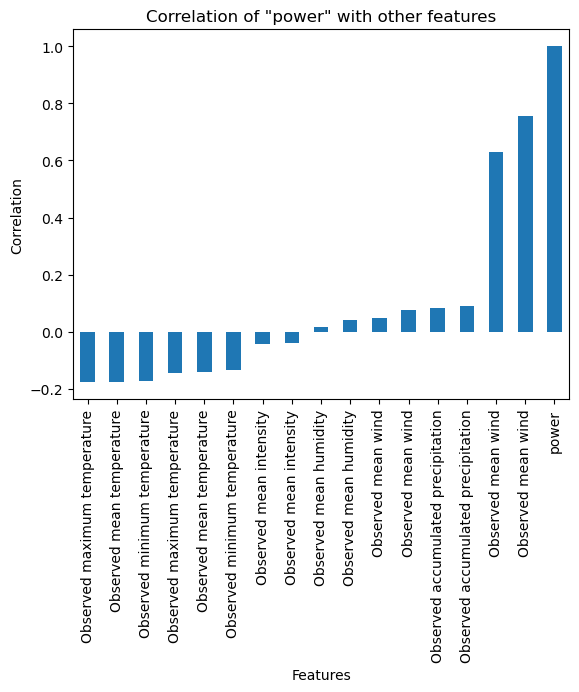

In [34]:
# Shorten the column names to first three words
data.columns = data.columns.str.split().str[:3].str.join(' ')

data.corr().iloc[:, 0].sort_values().plot(kind='bar')
plt.title('Correlation of "power" with other features')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

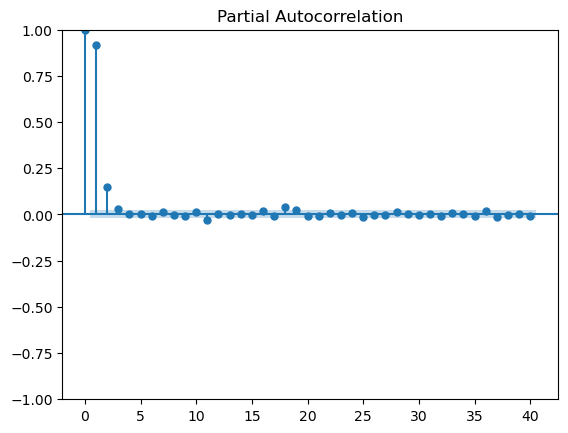

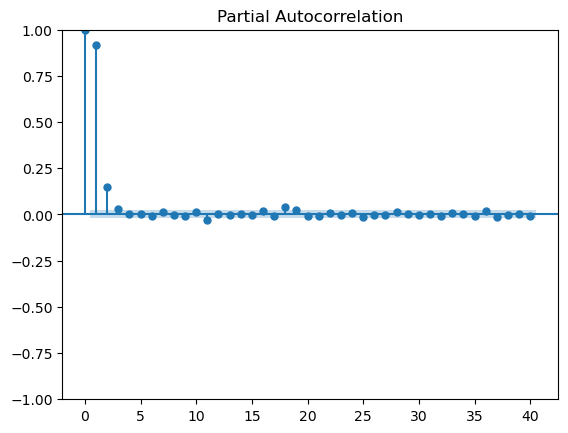

In [23]:
from statsmodels.graphics import tsaplots
tsaplots.plot_pacf(elprod)


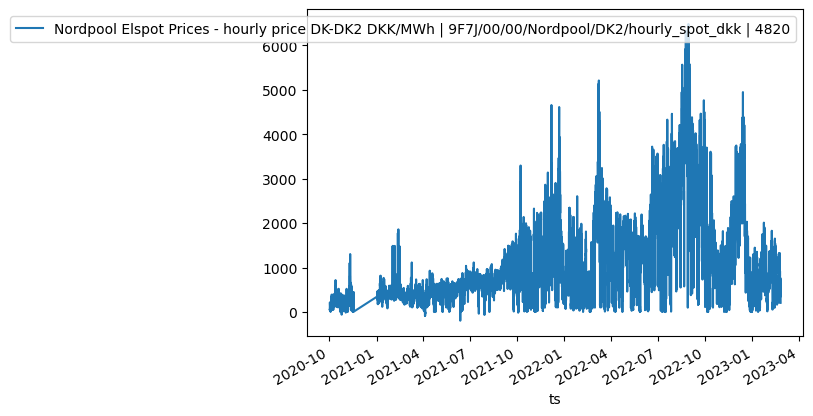

In [9]:
prices = pd.read_csv('data/prices.csv', decimal=',')
prices['ts'] = pd.to_datetime(prices['ts'])
prices = prices.set_index('ts')
prices.plot()
plt.show()

## Task 3: Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression




# Implement gradient descent
theta_gd = ...
# Implement closed form solution
theta_cfs = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Compare the two solutions
# print(theta_gd)
print(theta_cfs)


# Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

[[102.5392376 ]
 [ 56.41321967]]


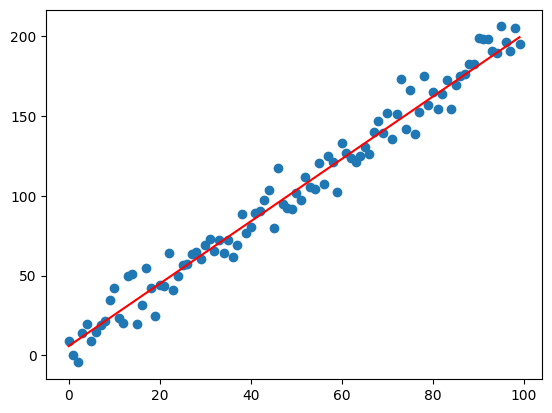

In [22]:
plt.scatter(x,y)
plt.plot(x, X @ theta_cfs, color='red')

## Task 4: Non-linear regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures

## Task 5: Regularization

In [6]:
from sklearn.linear_model import Ridge, Lasso


## Task 6: Revenue calculation for evaluation

## Task 7 (optional): Suggestion for improvement

In [7]:
from sklearn.cluster import KMeans

## Task 8: Model 2